# Lecture 12 - Sklearn

[Sklearn](https://scikit-learn.org/stable/) (package name `scikit-learn`) is a machine learning library, allowing you to run a large selection of machine learning algorithms on your data.

In the lectures so far (especially with Scipy), we were mostly looking at relationships between  **two features** (measurements) in a dataset  (i.e. _How is the type of vegetation related to the surface area of the lake?_). With machine learning methods, we typically want to relate **all the features** to a single **ground truth** value (this could be a class, such as an animal species, or a value to predict like the price of an item).

Today's lecture is structured as follows:
- [Introduction to Machine Learning](#Introduction-to-Machine-Learning)
- [Regression](#Regression)
- [Classification](#Classification)
- [Clustering](#Clustering)
- [Learning from a dataset](#Learning-from-a-dataset)

We will import different `sklearn` functionality one by one as we need it. For now, let us just import `numpy` and the plotting functionality from `matplotlib`:

In [1]:
from matplotlib import pyplot as plt
import numpy as np

## Introduction to Machine Learning

In machine learning, we often talk about different types of learning:
- **supervised learning:** learns from examples with known ground truth (e.g. we know energy expenses of many different households (each with different number of people living there); predict the energy expenses for a household with 2 adults and 1 child)
- **unsupervised learning:** finds structure in samples (e.g. for different app users, we know their average time spent on the app, their daily number of logins, and their number of friends; can we group the app users according to their typical behaviour using the app?)
- **reinforcement learning:** learns how to perform actions from feedback (dynamic behaviour; not covered in this lecture)

Further, when we talk about **supervised learning**, we can talk about two types of problems:
- **regression:** the target value we are trying to predict is a real-valued number (e.g. house prices, temperature, length)
- **classification:** the target value comes from a set of categories, types (e.g. animal or plant species, quality of wine)

Actually _quality of wine_ is a special type of "class" as it is _ordered:_ quality 7 is better than quality 5 (but we still can't have a wine with quality 6.31). This kind of classification problem is sometimes called _ordinal regression_. However, we will be treating ordinal regression problems as classification problems today.

In the first part of the lecture, we will show some visual examples of **regression**, **classification** and **clustering** - this means we will **train models** for those three tasks.

We will also show how to **evaluate** the models in case of supervised learning.

Finally, we will train a regression and classification model on one of the datasets used in the previous lectures.

## Regression

We will first start with regression. You have already seen this in the previous lecture, when we talked about approximating data with `numpy`.

Let us show some visual examples of data from which we might want to learn:
- In the 2D example, we have a single feature to learn from (e.g. size of the property) and we want to predict a single target value (e.g. the value of the property)
- In the 3D example, we have two features to learn from (e.g. the temperature and the air pressure) and the colour signifies the target value we want to predict (e.g. humidity)

Normally, you would be working with examples with many more features -- however it is difficult to visualise datasets with more than 2 features in a single image.

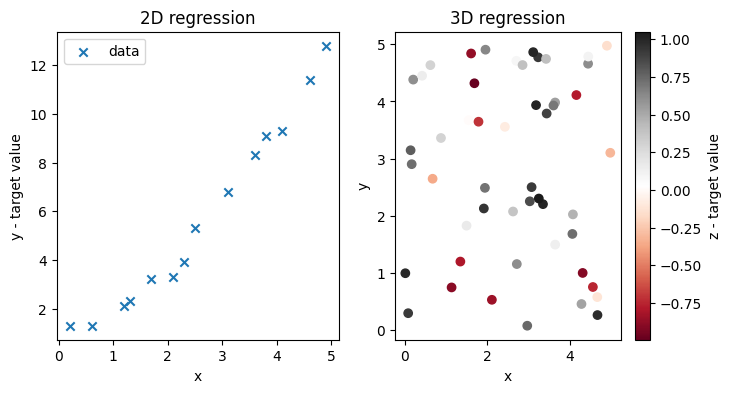

In [2]:
######## prepare our fake 2D data #########
### e.g. property size v property value ###
###########################################

# 2D data points
data = np.array([[1.2, 2.1],
                 [2.5, 5.3],
                 [0.2, 1.3],
                 [3.1, 6.8],
                 [2.3, 3.9],
                 [4.1, 9.3],
                 [3.6, 8.3],
                 [4.9, 12.8],
                 [2.1, 3.3],
                 [1.3, 2.3],
                 [0.6, 1.3],
                 [1.7, 3.2],
                 [3.8, 9.1],
                 [4.6, 11.4]])

############ prepare our fake 3D data ############
### e.g. temperature + air pressure v humidity ###
##################################################

# some 3D function we will sample 
# (underlying function describing our data, e.g.
# z = f(x, y) --> humidity = f(temperature, pressure)
# typically not known or given
def f(x, y):
    return np.cos(x) ** 10 + np.sin(10 + y * x) * np.sin(x)

# 3D data points
rng = np.random.default_rng(0)
# generate 50 sample points from the interval [(0,6), (0,6)]
# first feature, e.g temperature
sparse_x = rng.uniform(0, 5, size = 50)
# second feature, e.g. pressure
sparse_y = rng.uniform(0, 5, size = 50)
sparse_z = f(sparse_x, sparse_y)

# initialise a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize = (8, 4))

# on the first subplot, display the 2D points
axs[0].scatter(data[:, 0], data[:, 1], label = 'data', marker='x')
axs[0].set_xlabel("x")
axs[0].set_ylabel("y - target value")
axs[0].set_title("2D regression")
axs[0].legend()


# on the second subplot, display the 3D points
scat2d = axs[1].scatter(sparse_x, sparse_y, c=sparse_z, cmap = 'RdGy')
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_title("3D regression")

cbar = plt.colorbar(scat2d)
cbar.set_label("z - target value")

# in order to run the below cells WITHOUT VISUALISATIONS on 3D data,
# uncomment the following line. any cells producing figures will
# result in an error
# data = np.array([sparse_x, sparse_y, sparse_z]).T

plt.show()

Previously, we have shown how we can approximate a linear function from the data by performing _linear regression_ using [`numpy.polyfit()`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) (with `deg=1`), as well as how we could perform _polynomial regression_ using the same function to fit a polynomial of any degree to the data.

Let us revise that example:

In [ ]:
# calculate linear regression
slope, intercept = np.polyfit(data[:, 0], data[:, 1], 1)

# fit the quadratic function
a, b, c = np.polyfit(data[:, 0], data[:, 1], 2)

fig, ax = plt.subplots(figsize = (5, 3))

# show the data points:
ax.scatter(data[:, 0], data[:, 1], label = 'data', marker='x')

min_x, _ = np.min(data, axis=0)
max_x, _ = np.max(data, axis=0)

# show the results on dense data points between min and max
xs = np.arange(min_x, max_x, 0.01)

# calculate the outputs of linear regression and plot them
y_lin = intercept + slope*xs
ax.plot(xs, y_lin, color='g', label = 'f(x)={:.2f}x{:+.2f} (linear)'.format(slope, intercept))

# calculate the outputs of the fitted quadratic function, and plot them
y_quad = a*xs*xs + b*xs + c
ax.plot(xs, y_quad, color='r', ls='dashed', label = 'f(x)={:.2f}x'.format(a)+r'$^2$'+'{:+.2f}x{:+.2f} (quadratic)'.format(b,c))

# label the axis
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.show()

In sklearn, we can achieve the same thing - we say that we will _train_ a _regression model_.

First, we need to define our regression model:
- for _linear regression_, we can define a `LinearRegression` model directly by using [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- to fit a _quadratic function_, we can make a _composite model_: first, we will calculate the quadratic polynomial of our features using [`sklearn.preprocessing.PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) followed by a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We can combine these using [`sklearn.pipeline.Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

There are several key things to notice:
- for each model, we need to make an instance of the appropriate class
- all the classes defining a regression model have a `.fit(X, y)` function
- all the classes defining a regression model have a `.predict(X)` function

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# reshape the data for sklearn:
# each sample needs to be represented by an array, even if it has a single feature
X = data[:, 0].reshape(-1, 1)
# for the target value, we simply use the second coordinate of our data points
y = data[:, 1]

# define linear regression model and fit it to the data
model_lin = LinearRegression()
model_lin.fit(X, y)

# define the quadratic regression model and fit to the data
model_quad = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression())])
model_quad.fit(X, y)


fig, ax = plt.subplots(figsize=(5,3))

#show the data points:
ax.scatter(X.flatten(), y, label = 'data', marker='x')

min_x, _ = np.min(data, axis=0)
max_x, _ = np.max(data, axis=0)

# show the results on dense data points between min and max
xs = np.arange(min_x, max_x, 0.01).reshape(-1, 1)

# calculate the outputs of linear regression and plot them
y_linpredict = model_lin.predict(xs)
ax.plot(xs, y_linpredict, color='g', label = 'linear')

# calculate the outputs of the fitted quadratic function, and plot them
y_quadpredict = model_quad.predict(xs)
ax.plot(xs, y_quadpredict, color='r', ls='dashed', label = 'quadratic')

# label the axis
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.show()

Instead of visually, we can also try inspecting the features of and predictions for some samples. With a single feature and a single target value (like in our example), we can chose between visual representation and inspecting individual features. However, with real datasets containing many features, inspecting individual featurtes is often our only option.

In this example we:
- initialise two models (one simple one, [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), and a composite one using [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to combine a [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) transformation with [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) in order to performs a polynomial regression of degree 2),
- fit all our data to both models,
- define a single new sample and predict the value for this sample with both models,
- define three more new samples and predict their values with both models.


In [ ]:
# reshape the data for sklearn:
# select all features but the last for our samples (here, only 1 feature)
X = data[:, :-1]
# for the target value, we simply use the second coordinate of our data points
y = data[:, -1]
print("Sample from the dataset {} and the associated value {}".format(X[-1], y[-1]))
print("Each sample has {} feature(s)".format(X[-1].shape[0]))


model_linear = LinearRegression()
model_linear.fit(X, y)

model_quadratic = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression())])
model_quadratic.fit(X, y)

new_sample = [1.3]
#new_sample = [1.3, 2.5]
new_sample_prediction = model_linear.predict([new_sample])

print("Prediction (linear model) for a new sample {} is {}".format(
                            new_sample, new_sample_prediction))
print("Prediction (quadratic model) for a new sample {} is {}".format(
                            new_sample, model_quadratic.predict([new_sample])))

new_samples = [[1.3], [2.4], [5.2]]
#new_samples = [[1.3, 2.5], [2.4, 0.2], [5.2, 4.5]]

predictions_linear = model_linear.predict(new_samples)
predictions_quadratic = model_quadratic.predict(new_samples)

print("Predictions (linear model) for new samples {} are {}".format(new_samples, predictions_linear))
print("Predictions (quadratic model) for new samples {} are {}".format(new_samples, predictions_quadratic))

To **evaluate** our model, we could:
- Measure the performance on the **training data** (the data used to calculate the model): However, we want to estimate the performance on _unseen_ data! So this is not very indicative.
- **Split the dataset into a training and a testing portion**: We use less data for training, but we evaluate on unseen data. This can be achieved with [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

To **measure the performance**, there are different **metrics** (which can be found in [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)). Here, we show two metrics for regression:
- r-squared: goes from -1 to +1, with higher scores being better. "Scaled" metric ([`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score))
- mean absolute error: goes from 0 to infinity, with lower scores being better. "Unscaled" metric. ([`mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error))

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=3)

print("Training set (features): {}".format(X_train))
print("Ground truth (training set target values): {}".format(y_train))
print()
print("Testing set (features): {}".format(X_test))
print("Ground truth (testing set target values): {}".format(y_test))
print()
model = LinearRegression()

model.fit(X_train, y_train)

# how well does the model capture the relationship in existing data
print("r-squared score on training set {}".format(r2_score(y_train, model.predict(X_train))))
print("mean absolute error on training set {}".format(mean_absolute_error(y_train, model.predict(X_train))))

print()

y_predicted = model.predict(X_test)

print("Predictions for test set {}".format(y_predicted))
print()

# how well does the model predict the values of unseen data
print("r-squared score on test set {}".format(r2_score(y_test, y_predicted)))
print("mean absolute error on test set {}".format(mean_absolute_error(y_test, y_predicted)))

As we can see, calculating the _metrics on the training set are usually better than the testing set_ - models perform better on the data they have learned from, but this is **less indicative of future performance**.

Since we are using 2D data, we can provide a visual reminder of why that is (which isn't possible in general, since we would be basing our predictions on more than 1 or two features). Here, we plot two plots, with the training data on the left and testing data on the right. We show the results of linear regression on both plots, with the errors to the training and testing data respectively. Notice that, on average, the length of the error lines is shoter on the left plot.

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (8, 4), sharey=True)

min_x = np.min(X.flatten(), axis=0)
max_x = np.max(X.flatten(), axis=0)

# show the regression line between min and max
xs = np.arange(min_x, max_x, 0.01).reshape(-1, 1)

axs[0].scatter(X_train, y_train, label = 'training data', marker='x', c='b')
axs[0].plot(xs, model.predict(xs), color='r', label = 'linear regression', alpha = 0.4)

for x_sample, y_sample in zip(X_train, y_train):
    axs[0].plot([x_sample[0], x_sample[0]], [y_sample, model.predict([x_sample])[0]], c = 'black')
axs[0].plot([],[], 'black', label='error')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title("Fit to training data")

axs[0].legend()

axs[1].scatter(X_test, y_test, label = 'testing data', marker='x', c='g')
axs[1].plot(xs, model.predict(xs), color='r', label = 'linear regression', alpha = 0.4)
for x_sample, y_sample in zip(X_test, y_test):
    axs[1].plot([x_sample[0], x_sample[0]], [y_sample, model.predict([x_sample])[0]], c = 'black')
axs[1].plot([],[], 'black', label='error')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title("Fit to testing (unseen) data")


axs[1].legend()

plt.show()

There are also many other regression models you can try:
- [`linear_model.LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- [`linear_model.Lasso()`](https://scikit-learn.org/stable/modules/linear_model.html#lasso)
- [`linear_model.Ridge()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)
- [`linear_model.ElasticNet()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)
- [`neighbors.KNeighborsRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- [`svm.SVR()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)
- and many others...

## Classification

In regression, we were trying to predict a _continous_ (_numerical_) feature (e.g. predict house price from house size; predict humidity from temperature and air pressure).

With classification, we want to determine belonging to a class. Each sample in a dataset belongs to a _class_ or _type_. This could be:
- species of plant or animal
- quality of wine
- conservation status of a building...

If our data has only two features (e.g. height and length), we can show it in 2D, with each class represented in a different color.

Notice that we use [`sklearn.datasets.make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) to initialise `X` (samples) and `y` (labels) for a toy dataset.

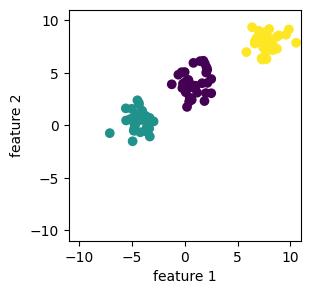

In [8]:
from sklearn.datasets import make_blobs
# random_state = 3 --> linearly separable classes
# random_state - 28 --> non-linearly separable
X, y = make_blobs(n_samples=100, centers=3, n_features=2,
                random_state = 3)

fig, ax = plt.subplots(figsize=(3,3))

ax.scatter(X[:, 0], X[:, 1], c= y)
ax.set_xlim([-11, 11])
ax.set_xlabel("feature 1")
ax.set_ylim([-11, 11])
ax.set_ylabel("feature 2")

plt.show()

Similarly, if our data has only 3 features, we can also visualise it in a 3D representation. For this, we combined the following `matplotlib` functionality:
- [`pyplot.figure()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) which initialises only the figure, without subplots
- [`figure.Figure.add_subplot()`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot) with `projection='3d'` keyword to instantiate a 3D-aware axis

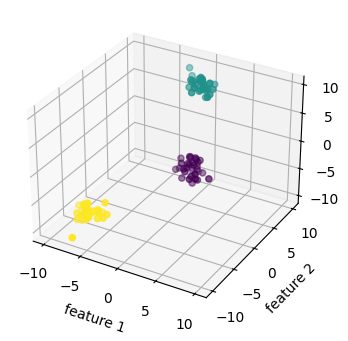

In [9]:
fig = plt.figure(figsize=(4,4))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1, projection='3d')

X, y = make_blobs(n_samples=100, centers=3, n_features=3,
                random_state = 3)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= y)
ax.set_xlim([-11, 11])
ax.set_xlabel("feature 1")
ax.set_ylim([-11, 11])
ax.set_ylabel("feature 2")
ax.set_zlim([-11, 11])
ax.set_zlabel("feature 3")

plt.show()

Training a classification model is similar to training a regression model:
- make an instance of your chosen model (here we use Support Vector Machines for classification, [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC))
- fit the model to the data using `.fit(X, y)` method (implemented by all classification models)
- predict the classes for new data using `.predict(X)` method (implemented by all classification models)

Just like with regression, we typically want to separate the training data from the testing data, and evaluate our model on the data which was not seen during training.

In case of 2D features, we can _visualise_ the _decision boundaries_ between different classes. For each new sample, we can _visualise_ the prediction in colour. We do this using [`sklearn.inspection.DecisionBoundaryDisplay(model, X_test)`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) function, passing the appropriate [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) object through the `ax` parameter.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# make a toy 2D dataset (n_features=2), with 3 classes (centers=3)
X, y = make_blobs(n_samples=100, centers=3, n_features=2,
                random_state = 3)

# separate it into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# initialise a svm classification model
model = SVC()

# fit the data to the model
model.fit(X_train, y_train)

# predict the classes of the testing set
y_predicted = model.predict(X_test)

fig, ax = plt.subplots(figsize=(3,3))

ax.set_xlim([-11, 11])
ax.set_ylim([-11, 11])

DecisionBoundaryDisplay.from_estimator(model, X_train, alpha = 0.5, eps = 20, ax = ax)

# plot the training points translucent
ax.scatter(X_train[:, 0], X_train[:, 1], c= y_train, alpha = 0.3)
# point the predicted classes of the testing points with full colour
ax.scatter(X_test[:, 0], X_test[:, 1], c = y_predicted, alpha = 1)

plt.show()

If our data has more than 3 features (in the following example, we have 10), we can not visualise the results.

The steps are still the same:
- initialise the model
- fit the data to the model using the `.fit()` method
- predict the classes of the new data using `.predict()` method

For our model, we are showcasing the [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

To evaluate our model, we can calculate different classification metrics:
- here we show using [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) which tells us what fraction of all testing samples was correctly classified
- we can also visualise more details through a _confusion matrix_: it tells us how many samples were predicted correctly _for each class_ (and shows us the nature of misclassifications). We can achieve this using [`metrics.ConfusionMatrixDsiplay()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) `.from_estimator()` method
- _Note:_ notice how the test set performance is lower than the training set performance

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

# initialise the dataset
X, y = make_blobs(n_samples=200, centers=4, n_features=10,
                random_state = 3)

# separate it into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# print some samples to the screen
print("Sample from the dataset: {}".format(X_train[-1].flatten()))
print("Associated class: {}".format(y_train[-1]))
print("All class labels: {}".format(np.unique(y_train)))

# initialise a classification model and fit it to the data
model = RandomForestClassifier(n_estimators = 3, max_depth = 3, random_state=1)
model.fit(X_train, y_train)

# predict the classes of the testing data
y_predicted = model.predict(X_test)

# print some testing samples to the screen
print("Sample from the test set: {}".format(X_test[1].flatten()))
print("Predicted class: {}".format(y_predicted[1]))
print()
print("Test set accuracy: {}".format(accuracy_score(y_test, y_predicted)))
print("Training set accuracy: {}".format(accuracy_score(y_train, model.predict(X_train))))

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(3,3))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax = ax)
ax.set_title("Confusion matrix")
plt.show()

Many classification algorithms are available:
- [`trees.DecisionTreeClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [`ensemble.RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [`svm.SVC()`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [`neighbors.KNeighborsClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- and many others...

## Clustering

Finally, with clustering, the data is provided with features but **no labels**. The goal is to try and "group" the data, by discovering some structure in it.

For example, you might be examining the data of users of some mobile application, and trying to determine what are the main types of user behaviours.

Typically, you would be working with more than 2 features in a dataset, but here we use 2D toy examples so we can visualise them.

Here, we use [`sklearn.dataset.make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to make a toy dataset, this time in a different shape. Visually, it is easy for a human to group these into two distinct clusters (groups). Notice that we discard the classes of the toy dataset by assigning them to a throwaway variable `_`.

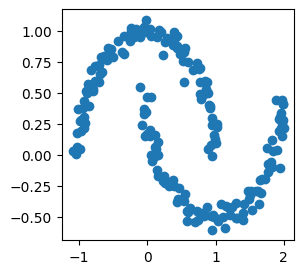

In [12]:
from sklearn.datasets import make_moons

# produce some toy data
noisy_moons, _ = make_moons(n_samples=200, noise=0.05)

# display it
fig, ax = plt.subplots(figsize=(3,3))

ax.scatter(noisy_moons[:, 0], noisy_moons[:, 1])

plt.show()

Here, we demonstrate the use of [`sklearn.cluster.DBSCAN()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) clustering approach.

Clustering algorithms primarily attempt to group their _training data_, so unseen _testing data_ is not required. Therefore, instead of a `.fit()` method followed by a `.predict()` method, they often implement a `.fit_predict()` method performing both functionalities at once.

In [ ]:
from sklearn.cluster import DBSCAN
X = noisy_moons

# initialise the clustering model
model = DBSCAN(eps = 0.3)

# fit the data to the model, and predict the clusters (in the same operation)
cluster_labels = model.fit_predict(X)

# display the data
fig, ax = plt.subplots(figsize=(3,3))

ax.scatter(noisy_moons[:, 0], noisy_moons[:, 1], c = cluster_labels)

plt.show()

However, many more clustering algorithms are available for you to use:
- [`cluster.DBSCAN()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
- [`cluster.SpectralClustering()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)
- [`cluster.AgglomerativeClustering()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
- [`cluster.KMeans()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [`mixture.GaussianMixture()`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture)
- and many others...

# Learning from a dataset

Instead of on toy data, here we will demonstrate applying different machine learning approaches to [Wine Quality of Portugeese Wines](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) [[1]](#References) (please download the file `winequality-red.csv` from Blackboard) which we have used previously.

First, let us load and inspect the dataset.

In [14]:
import pandas as pd

wines_df = pd.read_csv('winequality-red.csv', sep = ';')
print(wines_df.shape)
wines_df

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In this example, we will train a **regression model** to predict `alcohol` from all other features (except `quality`).

This is done in the following steps:
- we are using [`sklearn.neigbors.KNeigborsRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) to define a K-Nearest Neigbors model with the parameter `n_neigbors=9`
- we split our dataset into training and testing set using [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- we fit the model to the training data using `.fit(X, y)` method
- we predict the value of `alcohol` for the testing data using `.predict(X)` method
- we evaluate the performance on the test set with [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) and [`mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) metrics

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

X = wines_df[wines_df.columns[:-2]].values
y = wines_df[wines_df.columns[-2]].values

print("A sample {} and the ground truth value {}".format(X[5], y[5]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

model = KNeighborsRegressor(n_neighbors = 9)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print("r2 on test set: {}".format(r2_score(y_test, y_predict)))
print("MAE on test set: {}".format(mean_absolute_error(y_test, y_predict)))

print("r2 on training set: {}".format(r2_score(y_train, model.predict(X_train))))
print("MAE on training set: {}".format(mean_absolute_error(y_train, model.predict(X_train))))

print("Wine with features {} has predicted alcohol content {} (real {})".format(
    X_test[15], y_predict[15], y_test[15]))

In the following example, we train a **classification model** to predict `quality` from all features.

This is done in the following steps:
- we are using [`sklearn.neigbors.DecisionTreeClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to define a decision tree classifier
- we split our dataset into training and testing set using [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- we fit the model to the training data using `.fit(X, y)` method
- we predict the value of `alcohol` for the testing data using `.predict(X)` method
- we evaluate the performance on the test set with [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) (with `average='weighted'` parameter) metrics, and by displaying the confusion matrix

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

X = wines_df[wines_df.columns[:-1]].values
y = wines_df[wines_df.columns[-1]].values

print("A sample {} and the ground truth value (quality) {}".format(X[5], y[5]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print("accuracy on test set: {}".format(accuracy_score(y_test, y_predict)))
print("f1-weighted on test set: {}".format(f1_score(y_test, y_predict, average='weighted')))

print("accuracy on training set: {}".format(accuracy_score(y_train, model.predict(X_train))))
print("f1-weighted on training set: {}".format(f1_score(y_train, model.predict(X_train), average='weighted')))

print("Wine with features {} has predicted quality {} (real {})".format(
    X_test[20], y_predict[20], y_test[20]))

fig, ax = plt.subplots(figsize=(3,3))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax = ax)
ax.set_title("Confusion matrix")
plt.show()

## References
[1] _Cortez, P., Cerdeira, A., Almeida, F., Matos, T. and Reis, J., 2009. Modeling wine preferences by data mining from physicochemical properties. Decision support systems, 47(4), pp.547-553._